# Lecture 1 - Exploratory Data Analysis (EDA)

In this notebook, we go through some basic steps of an Explorative Data Analysis (EDA). The dataset and the results are roughly in line with the examples shown in the slides for Lecture 1.

EDA is a very important step to ensure reliable results for any kind of data analysis. Datasets are often noisy (missing values, outliers, errors, etc.) which can negatively affect the results ("*garbage in, garbage out*"). Apart from noise, a good understanding of the data is important for the application of data preprocessing and data analysis algorithms.

**Note:** The EDA generally depends on the type of dataset (e.g., records, transactions, text, images, etc.), the task (clustering, classification, regression, association rule mining, etc), and even the specific algorithm for a given task -- for example, data normalization is typically not required when using Decision Trees compared to, e.g., K-Nearest Neighbor classifiers.

Let's get started...

## Setting up the notebook

Specify how plots get rendered

In [1]:
%matplotlib notebook

Make all required imports

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Data Preparation

### Loading the Data

The dataset is directly taken from Kaggle. You can check the following long for more details about the dataset, particularly the documentation of the different attributes and attribute ranges:

https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

In [3]:
df = pd.read_csv('data/cardio_train.csv', sep=';')

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Just by looking at the first 5 data points data we can make some observations

* `age` are 5-digits values, so the age is arguably not expressed in years; a look in the documentation states that it's the age in number of days

* Cholesterol levels are commonly measured in (mg/dL). However, the integer values for `cholesterol` indicate that this is a categorical attribute. Again, the documentation clarifies: `1 = normal`, `2 = above normal`, `3 = well above normal`

* In this small sample `gluc`, `smoke`, `alco` show now variations in their values. It might be worth to check if indeed the values are all the same, since in this case respective attributes can be removed (not true in this case; see below).

* `cardio` is a categorical attribute with `cardio=1` representing that a person suffers from a cardiovascular disease. So the prediction whether an unknown person is suffering from a cardiovascular disease is classification task.

* `id` is an artificial attribute (i.e., not a personal attribute) and should generally be removed before any analysis

In [4]:
num_points, num_attributes = df.shape

print("There are {} data points, each with {} attributes.". format(num_points, num_attributes))

There are 70000 data points, each with 13 attributes.


### Messing up the Data

This dataset is a little bit too clean for an interesting EDA -- (arguably) no missing values or other noise. For the purpose of this tutorial, we therefore can artificially mess up the data a bit ourselves.

#### Change Unit of an Attribute

All hight measurements are in cm; see documentation. Let's pretend that 20% of the heights have been recorded in inches.

In [5]:
# Get sample of size 20%
df_sample = df.sample(int(num_points/5))

# Convert the height of data points in this sample from "cm" to "inch" (incl. rounding)
df_sample.height = np.round(df_sample.height * 0.393701)

# Update the original data frame
df.update(df_sample)

#### Add Missing Values

We first add missing data in terms of setting 10% of all weight measurements to 0. In practice, this might reflect that a person was no willing to report his or her weight

In [6]:
# Get sample of size 10%
df_sample = df.sample(int(num_points/10))

# Set weight to 0 across sample
df_sample.weight = 0

# Update the original data frame
df.update(df_sample)

Additionally, we set 1% of all cells (i.e., row/column combinations) to NA

In [7]:
df = df.mask(np.random.random(df.shape) < 0.01, other=np.NaN)

**Note:** There are certainly more "sophisticated" ways to mess up the data a more natural way. But in the context of this notebook, this more the sufficient to get the goals and challenges of an EDA across.

### Save the Messy Data

Since our mess-up steps include randomized steps, let's save the resulting messy dataset so we can reproduce our results later on.

In [8]:
df.to_csv('data/cardio_train_messy.csv', sep=';', index=None)

## EDA

If not stated otherwise, we assume that `cardio_train_messy.csv` is the dataset we would receive (e.g., download from Kaggle).

In [9]:
df = pd.read_csv('data/cardio_train_messy.csv', sep=';')

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0.0,18393.0,2.0,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,20228.0,1.0,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0
2,2.0,18857.0,1.0,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0
3,3.0,17623.0,2.0,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0
4,4.0,17474.0,1.0,156.0,0.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0


### Missing Values

Missing values general refer to (parts of the) data that are indeed missing. For example, the dataset used in this notebook is a text file where each line represents a data point, i.e., a record, and the attributes of each record are separated by a semicolon, e.g.:

`16.0;;2.0;173.0;60.0;120.0;80.0;1.0;1.0;0.0;0.0;1.0;0.0`

In this example, the second attribute, representing the `age`, is missing.


#### NA Values

The following commands finds all rows that have at least 1 NA value in any column.

In [10]:
row_has_na = df.isna().any(axis=1)

print(row_has_na)

0        False
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Length: 70000, dtype: bool


In [11]:
df_na = df[row_has_na]

print("There are {} data points that have at least 1 missing value (NA)".format(df_na.shape[0]))

There are 8596 data points that have at least 1 missing value (NA)


#### Default Values

If no documentation is available or the documentation is lacking this information, it's not obvious if a column might feature a default value with special interpretation.

A basic way to approach is, is to look at the distribution of values for each attribute. In the following, we plot the distribution of the values for `weight`.

<IPython.core.display.Javascript object>


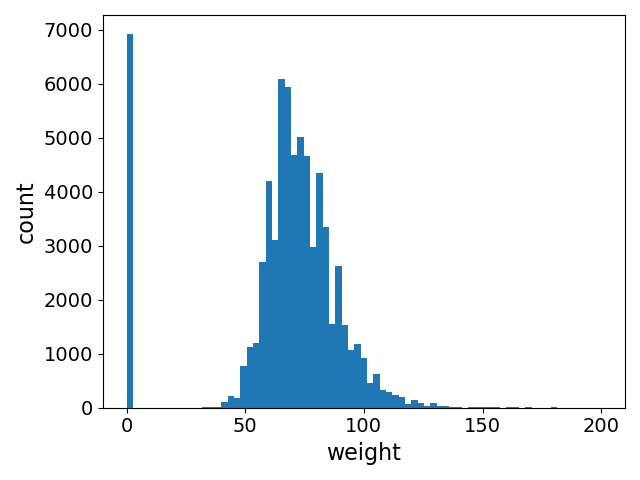

In [12]:
plt.figure()
plt.tick_params(labelsize=14)
plt.hist(df['weight'].to_numpy(), bins=75)
plt.xlabel('weight', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.tight_layout()
plt.show()

Given that value 0 clearly stands out and no person has a weight of 0, it is not unreasonable to assume that it represents some kind of default value. In practice, of course, this kind of interpretation might be much less obvious.

### Identifying Odd Distributions

Looking at the distribution of attribute values can also help to spot oddities in terms mixed units. For example, if we plot the distribution for `height`, we can easily see the 2 parts reflecting the heights in cm and the heights in inches.

<IPython.core.display.Javascript object>


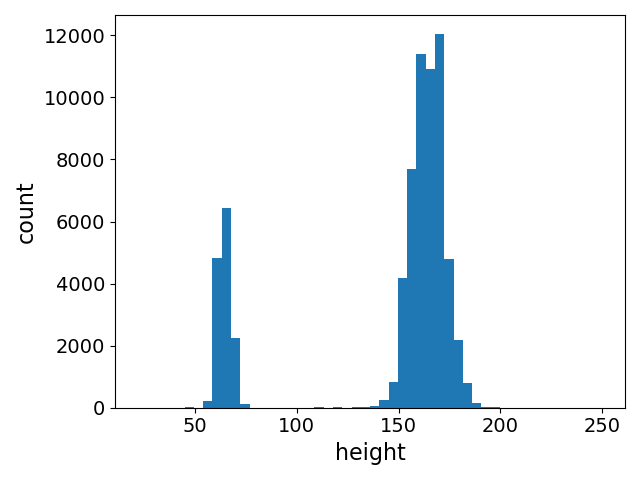

In [13]:
plt.figure()
plt.tick_params(labelsize=14)
plt.hist(df['height'].to_numpy(), bins=50)
plt.xlabel('height', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.tight_layout()
plt.show()

Again, in practice, this differences can be much less obvious and therefore very difficult to spot. For example, imagine, that a much smaller percentage of data points features the "wrong" unit for a data point and/or the scale of the units is much similar (e.g., kilometers vs. miles in case of distances).

For categorical attributes, it's often more straightforward to simply check the set of unique values. Note that we first have to remove all NA in each respective column (if we haven't done so yet).

In [14]:
print(np.unique(df['gluc'][~np.isnan(df['gluc'])]))
print(np.unique(df['alco'][~np.isnan(df['alco'])]))
print(np.unique(df['active'][~np.isnan(df['active'])]))

[1. 2. 3.]
[0. 1.]
[0. 1.]


So our initial hope that some attributes show no variations at all have not been confirmed.

### Outliers

Simply speaking, outliers are data points that a "very different" compared to the majority of points in a data sets -- that is, in the most basic case, the value of one or more attributes of outliers are far from the attribute average/median.

Outliers can be the result of noise (e.g., missing a decimal point during manual data entry) but also correct data points (e.g., the salary of a company's CEO).

#### Check Outliers on Original Data (i.e., the the units haven't been messed up)

In this case, we know that all the heights are in cm

In [15]:
df = pd.read_csv('data/cardio_train.csv', sep=';')

# Not really needed since original data has no NA values
df = df.dropna(subset=['height', 'weight'])

Boxplots are good way to visualize ouliers. By default, outliers are all values below `(Q1 - 1.5*IQR)` and above `(W3 + 1.5*IQR)` with

* `Q1`: median of the lower half of the dataset
* `Q3`: median of the upper half of the dataset
* `IQR`: interquartile range with `IQR = Q3-Q1`

<IPython.core.display.Javascript object>


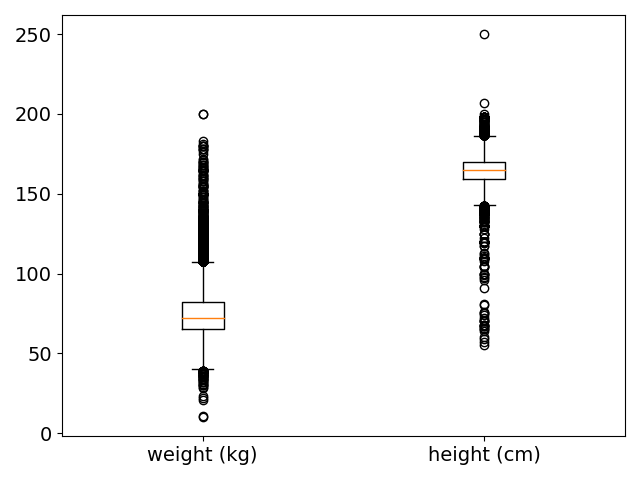

In [16]:
X_weight = df['weight']
X_height = df['height']

plt.figure()
plt.tick_params(labelsize=14)
plt.boxplot([X_weight, X_height])
ax = plt.gca()
ax.set_xticklabels(['weight (kg)', 'height (cm)'])
plt.tight_layout()
plt.show()

The data point that stands out most is a height of ~250cm, as this would put the person in the top-10 of tallest people who have ever lived. It's arbitrary unlikely that such a person is in our dataset.

#### Check outliers on messy data

In [17]:
df = pd.read_csv('data/cardio_train_messy.csv', sep=';')

df = df.dropna(subset=['height', 'weight'])

<IPython.core.display.Javascript object>


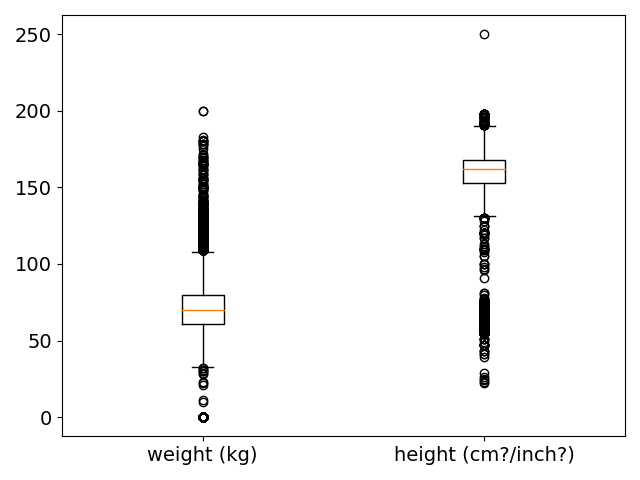

In [18]:
X_weight = df['weight']
X_height = df['height']

plt.figure()
plt.tick_params(labelsize=14)
plt.boxplot([X_weight, X_height])
ax = plt.gca()
ax.set_xticklabels(['weight (kg)', 'height (cm?/inch?)'])
plt.tight_layout()
plt.show()

#### Correlation Outliers

Outliers might manifest not only w.r.t. to a single attribute values but also a combination of attributes. For example, a person might weigh 10 kg (e.g., a baby/toddler) but a combination with a height of 200 cm is clearly some kind of noise

Again, let's use the original data without any messed up units for height (cm vs inch) to find outliers that most likely constitute noise.

In [19]:
df = pd.read_csv('data/cardio_train.csv', sep=';')

<IPython.core.display.Javascript object>


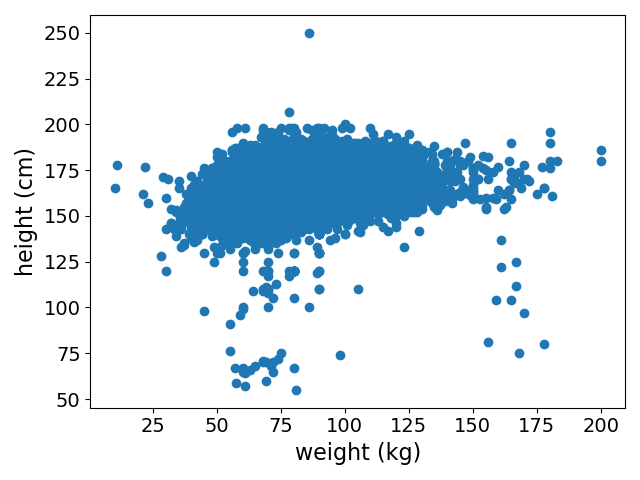

In [20]:
X_weight = df['weight']
X_height = df['height']

plt.figure()
plt.tick_params(labelsize=14)
plt.scatter(X_weight, X_height)
plt.xlabel('weight (kg)', fontsize=16)
plt.ylabel('height (cm)', fontsize=16)
plt.tight_layout()
plt.show()

Some observations just by looking at the plot

* Of course, we can still see outliers w.r.t. to a single attribute like the one data point with a height of about 250cm, particularly now that this person is supposed to also weight less than 100kg.

* While babies, toddlers or small children weigh below, say, 20kg, for a person of average height (~170cm), this is arguably not survivable.

* Similarly, some persons have a very high weight (>150kg) but are also very small (<100cm). One can argue that this most likely represents noise data.

### Class Distribution

Since we already identified this prediction task as a classification task, we can check the distribution of class labels. Ideally, all class labels are more or less equally distributed to make the identification and evaluation of patterns generally easier. But note that this is just a rule of thumb.

In [21]:
# Get all labels (attribute "cardio") as a numpy array
# (not that there might be NA values for "cardion"; we have to remove those first)
labels = df['cardio'].dropna().to_numpy()

# Calculate all unique labels together with their respective counts
(labels, counts) = np.unique(labels, return_counts=True)

# Normalize the counts
counts = counts / np.sum(counts)

print(counts)

[0.5003 0.4997]


While in this case we can already see that the labels are pretty much perfectly balanced, we can also plot it, for example using a pie chart.

<IPython.core.display.Javascript object>


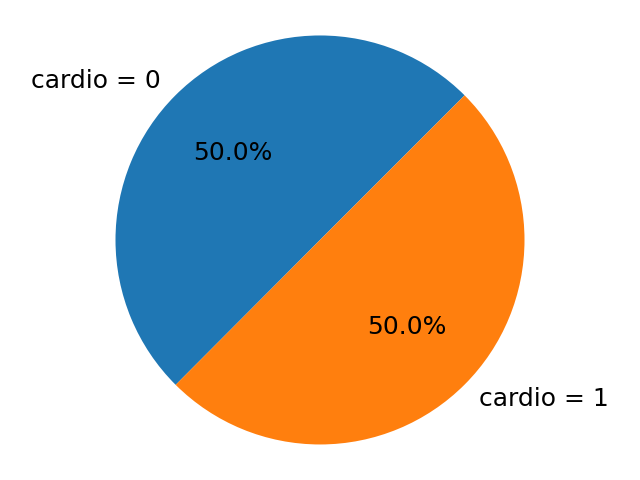

In [22]:
# Define labels
labels = 'cardio = 0', 'cardio = 1'

fig1, ax1 = plt.subplots()
plt.tick_params(labelsize=24)

patches, texts, autotexts = ax1.pie(counts, labels=labels, autopct='%1.1f%%', shadow=False, startangle=45)

for t in texts:
    t.set_fontsize(18)
for t in autotexts:
    t.set_fontsize(18)    
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

## Summary

The are many causes for dealing with noisy or messed up data. The most basic one are arguable missing values. On the one hand, there NA values that simply cause errors when applying data analysis algorithms. In general, NA values are typically easy to spot at least. On the other hand, default values are often less obvious but can easily distort even simple analyses such as the calculation of means and variances. Other types of noise such as outliers or "mixed units" can be much more difficult to spot. Lastly, EDA can also help if a given dataset lacks a proper documentation. For example, it is not always obvious if a attributes with integer values is a numerical of categorical attribute.

Summing up, the better you know and understand your data, the more likely you can avoid subpar analysis results due to low data quality. How to fix or clean messy data -- if possible to what extent -- is part of data preprocessing (see notebook).